In [1]:
import sys
import pydot
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import metrics
from openpyxl import load_workbook
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
import joblib
import shap

In [2]:
data_path='./summary_data.csv'
data=pd.read_csv(data_path,header=0)

Y=np.array(data['S. cerevisiae Average abundance'])
X=data.drop(['E. coli Average abundance', 'S. cerevisiae Average abundance'],axis=1)
X_column_name=list(X.columns)
X=np.array(X)

loaded_rf = joblib.load("./RF/my_random_forest.joblib")

In [3]:
shap.initjs()

In [4]:
explainer = shap.Explainer(loaded_rf)
shap_values = -1 * explainer(X)

In [5]:
shap.force_plot(explainer.expected_value, shap_values.values, X)

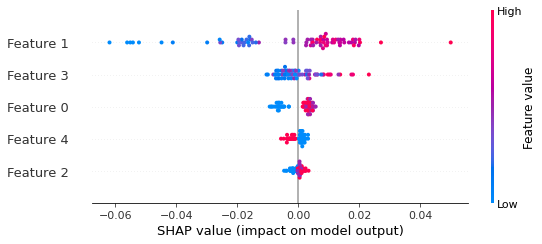

In [6]:
shap.summary_plot(shap_values, X)

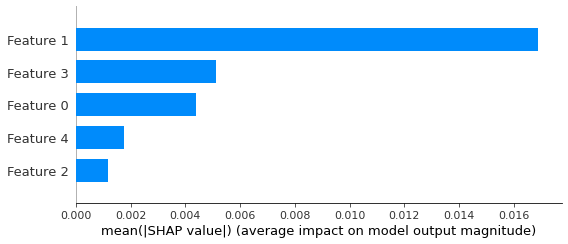

In [7]:
shap.summary_plot(shap_values, X, plot_type="bar")

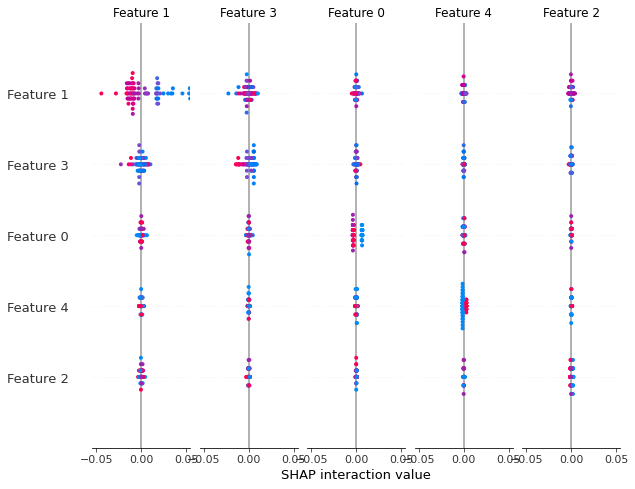

In [8]:
shap_interaction_values = explainer.shap_interaction_values(X)
shap.summary_plot(shap_interaction_values, X)

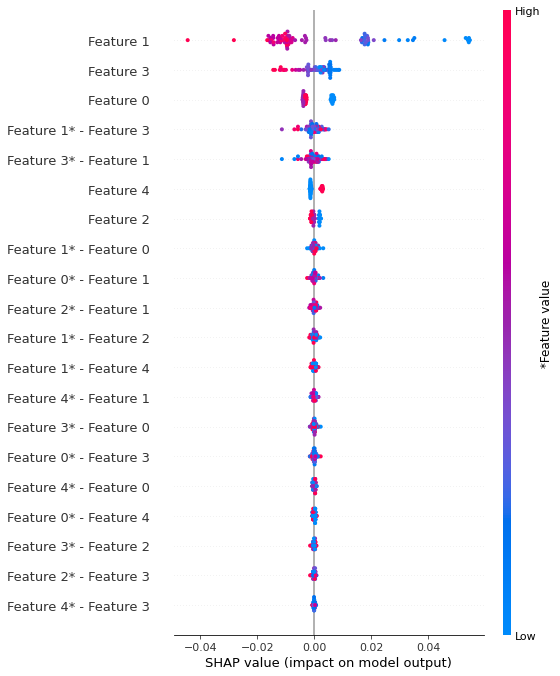

In [9]:
shap.summary_plot(shap_interaction_values, X,max_display=20,plot_type="compact_dot")

In [10]:
len(shap_values)

78

In [11]:
shap_values

.values =
array([[-4.71221990e-03,  2.00445126e-02,  1.87246416e-04,
         5.71462326e-03,  2.41704018e-03],
       [-6.61513272e-03,  5.92039853e-03,  9.44035005e-04,
        -5.50365222e-03,  2.18415001e-03],
       [ 3.07776192e-03, -1.93166758e-02, -1.66862927e-03,
        -3.51355676e-04,  4.19401002e-04],
       [ 3.64913593e-03,  1.79443126e-02,  6.71171686e-04,
         6.34213637e-03,  1.31807906e-03],
       [ 1.81906184e-03, -2.55767770e-02,  2.50668998e-05,
        -1.04062810e-02,  8.58107564e-04],
       [ 3.45305078e-03, -4.19997378e-03, -1.84653299e-03,
        -1.24050513e-04,  1.55209710e-03],
       [ 3.78481708e-03, -5.61332725e-02,  5.39265817e-04,
        -6.80132312e-03,  6.18301563e-04],
       [ 1.45869329e-03,  7.15425964e-03, -1.37354738e-04,
        -2.33005467e-03,  9.56991125e-04],
       [ 3.30835371e-03,  2.54954530e-03, -2.58510400e-03,
         3.64776078e-03,  1.42695665e-03],
       [-6.92538267e-03,  4.08110736e-03, -6.06910198e-04,
        -8.18